In [ ]:
!pip install seaborn
!pip install plotly


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ------------- -------------------------- 102.4/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\34634\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\34634\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots


## Pandas y Matplotlib

**Matplotlib** es una de las bibliotecas más utilizadas para la visualización de datos en Python. Es poderosa, flexible y puede crear una amplia variedad de gráficos, desde los más simples hasta los más complejos.

**Pandas** tiene una función integrada llamada _plot()_ que puedes usar directamente sobre un DataFrame o una Serie. Esta función, por defecto, utiliza matplotlib como backend, lo que significa que genera gráficos usando matplotlib en segundo plano. Aunque no es tan avanzado como otras bibliotecas especializadas en visualización como seaborn, pandas permite crear gráficos sencillos de forma directa a partir de sus DataFrames y Series.

Los tipos de visualizaciones de pandas son:

- line: Gráfico de líneas.
- scatter: Gráfico de dispersión.
- bar: Gráfico de barras.
- barh: Gráfico de barras horizontales.
- hist: Histograma.
- box: Boxplot.
- kde o density: Gráfico de densidad.
- area: Gráfico de áreas.
- pie: Gráfico circular.

Estos gráficos están disponibles directamente desde pandas al usar df.plot(kind='tipo').

Veamos estas herramientas en acción.

In [2]:
data = pd.read_csv("data.csv")
data

,order_id,fecha,order_customer_id,product_id,unit_price,quantity,price,product_family,latitude,longitude
0,1016330781887,2023-05-29,6451824076,IAM925P00XXZPUDIA,19.00,8,152.00,Pulsera,37.788617,-3.790215
1,1095376438463,2023-07-16,664062345899,OTS925P00XXZPUDOT,19.00,6,114.00,Pulsera,40.299542,-3.926774
2,1047641588927,2023-06-17,642133246635,UND925P00XXZCOMUN,25.00,5,125.00,Collar,39.651927,-0.411277
3,1181322118257,2023-08-29,714672128644,OTS925A00XXZPUDOT,19.00,4,76.00,Pulsera,39.456511,-0.346203
4,1017492866239,2023-05-30,196440539724,IMO925P00XXZTOMIM,25.00,3,75.00,Tobillera,37.394171,-5.957857
...,...,...,...,...,...,...,...,...,...,...
2995,1194025288817,2023-09-04,719590867588,IST925P00XXZPUSIS,29.95,1,29.95,Pulsera,40.405862,-3.894836
2996,1187671966833,2023-09-01,719629009540,UND925P00XXZCOMUN,25.00,1,25.00,Collar,40.549157,-3.653147
2997,1187874473073,2023-09-01,719731344004,OSE925R00XXZCOMOS,29.00,1,29.00,Collar,43.341313,-2.989285
2998,1187874473073,2023-09-01,719731344004,HDI925R00XXZPEAHD,21.75,1,21.75,Pendientes,43.341313,-2.989285


In [3]:
# Describimos la variable price
data["price"].describe()

,price
count,3000.000000
mean,26.684290
std,9.868083
min,14.250000
25%,22.000000
50%,25.000000
75%,29.000000
max,199.000000


Los gráficos de barras se utilizan para comparar valores entre diferentes categorías.



[(0.0, 80.0)]

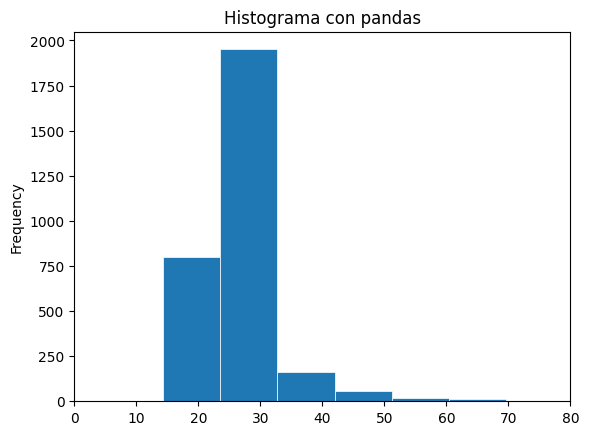

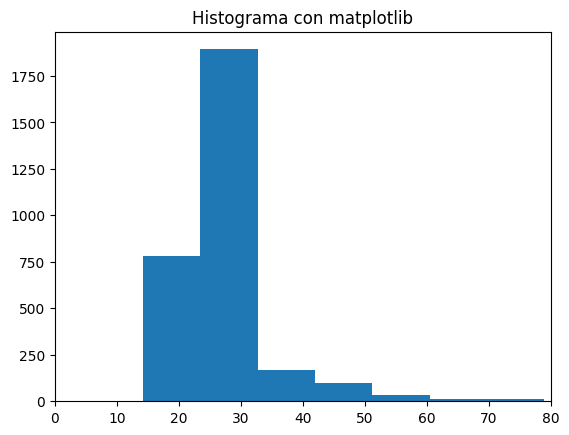

In [6]:
# Visualizamos price con histograma
# Como se distribuyen los precios de los productos comprados?

## Version en pandas
data["unit_price"].plot(kind='hist', bins=20, linewidth=0.5, edgecolor="white", title = "Histograma con pandas", xlim=(0, 80))

## Version en matplotlib
fig, ax = plt.subplots()
ax.hist(data["price"], bins=20, linewidth=0.5)
ax.set_title('Histograma con matplotlib')
ax.set(xlim=(0, 80))

Text(0.5, 1.0, 'Pie chart con matplotlib')

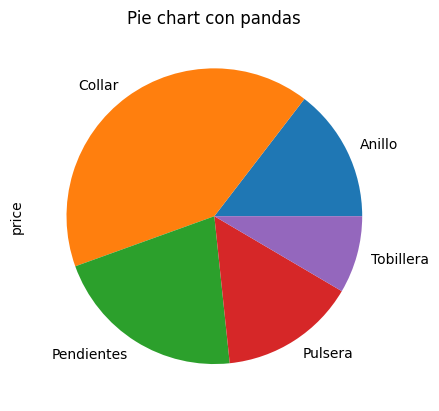

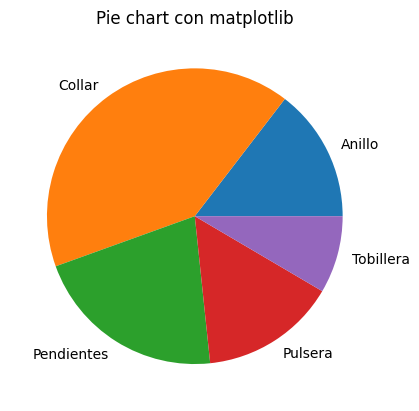

In [7]:
# Visualizacion con pie chart
# Cuanto ha facturado cada familia de productos?

facturacion_por_familia = data.groupby("product_family")["price"].agg("sum")

## Version en pandas
facturacion_por_familia.plot(kind = "pie", title = "Pie chart con pandas")

## Version en matplotlib
fig, ax = plt.subplots()
ax.pie(x = facturacion_por_familia, labels = facturacion_por_familia.index)
ax.set_title('Pie chart con matplotlib')

<Axes: title={'center': 'Grafico de lineas con pandas'}, xlabel='fecha'>

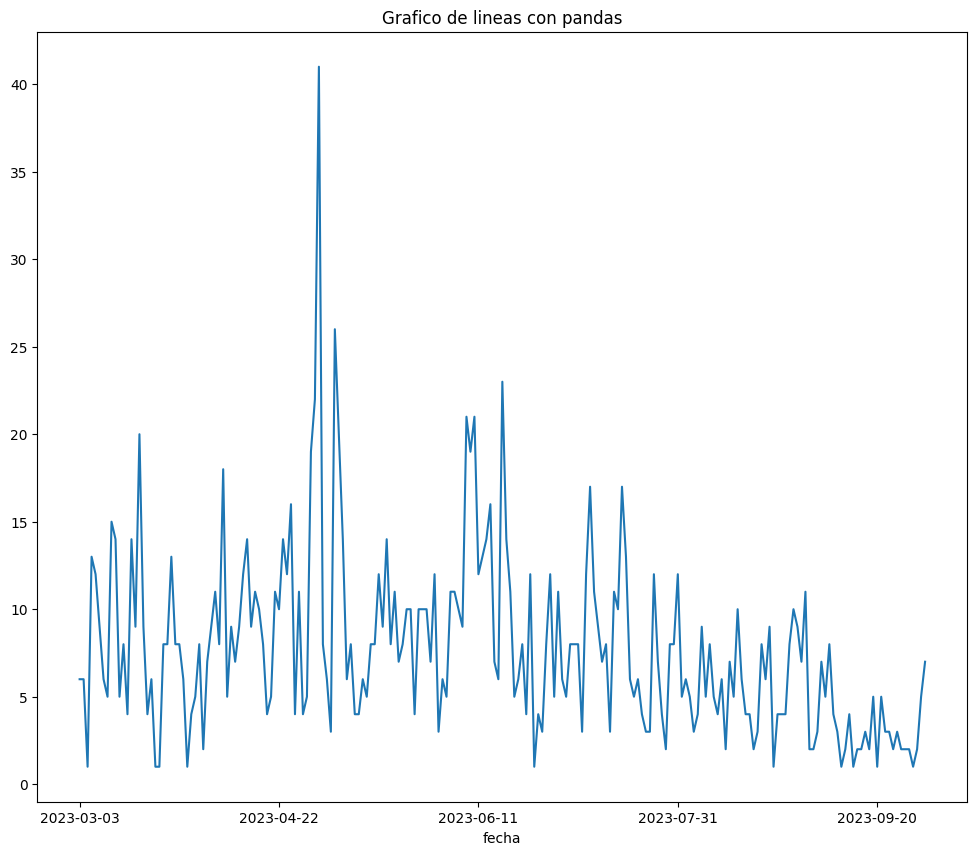

In [8]:
# Visualizacion con line chart
# Cuantas orders se han hecho cada dia?
data_daily = data.groupby(["fecha"])["order_id"].agg("nunique")

# data_daily.plot(kind='bar')
data_daily.plot(kind='line', figsize=(12, 10), title = "Grafico de lineas con pandas")



<Axes: xlabel='fecha'>

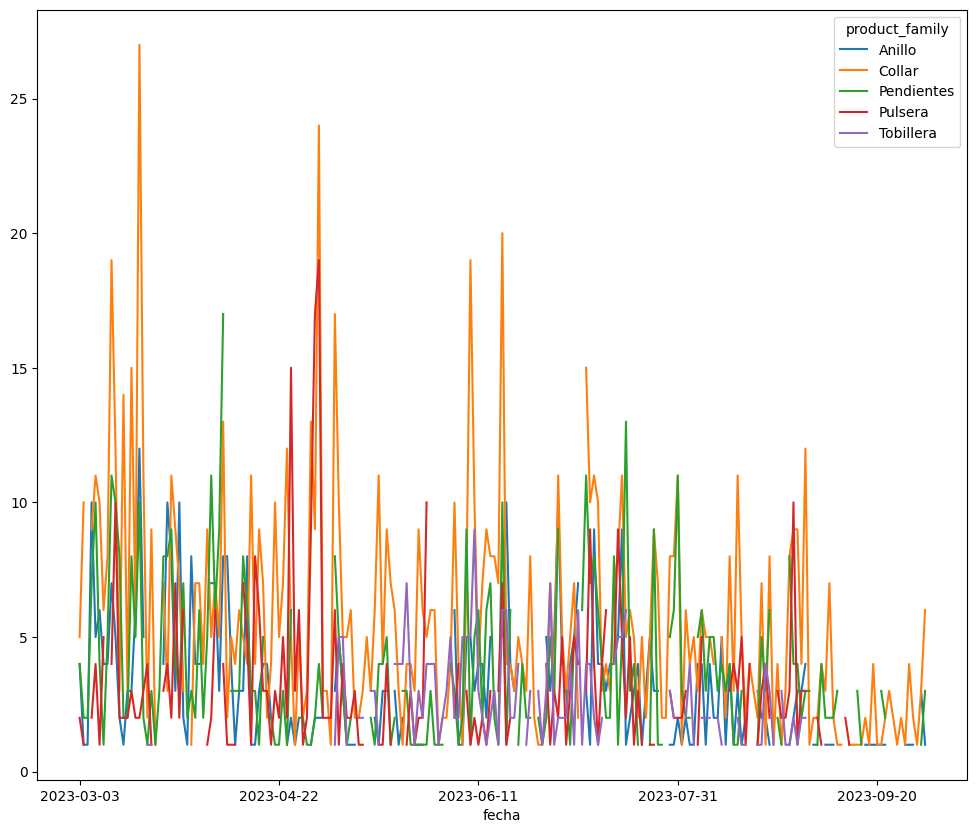

In [10]:
# Cada dia cuantas unidades se han vendido de cada producto?

data.groupby(['fecha', 'product_family'])['quantity'].sum().unstack().plot(figsize=(12, 10), kind='line')


<Axes: xlabel='unit_price', ylabel='price'>

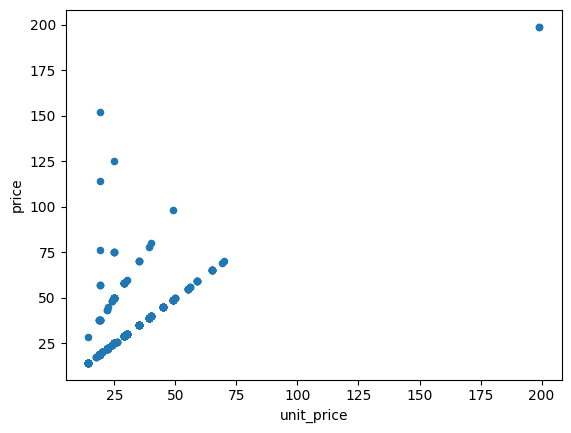

In [13]:
# Scatterplot
data.plot(x='unit_price', y='price', kind='scatter')



Un boxplot se usa para mostrar la distribución de una variable y destacar los valores atípicos y los cuartiles.

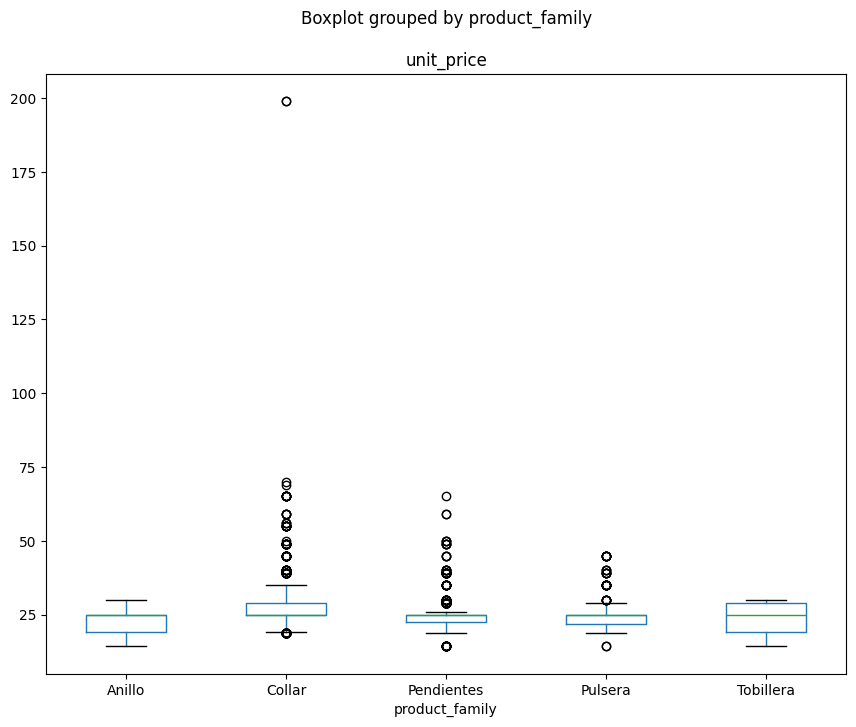

In [16]:
# Visualizamos unit_price con boxplot

# pandas
ax = data.boxplot(column='unit_price', by='product_family', grid=False, figsize=(10, 8))
# ax.set_ylim(0,80)

## Seaborn

Seaborn es una biblioteca de visualización de datos basada en matplotlib, diseñada para hacer gráficos estadísticos más atractivos y fáciles de crear. Se integra perfectamente con pandas, lo que la convierte en una opción ideal cuando trabajas con DataFrames. Con seaborn, puedes generar gráficos con menos código y con mejor estilo visual por defecto, además de ofrecer funcionalidades avanzadas para manejar fácilmente datos categóricos, numéricos y relaciones entre variables.

Ventajas de Seaborn:

- Estética mejorada: Los gráficos generados por defecto son más atractivos y claros que los de matplotlib.

- Integración con pandas: Funciona perfectamente con DataFrames, lo que hace que sea fácil visualizar columnas de datos.

- Gráficos estadísticos avanzados: Ofrece gráficos para ver relaciones y distribuciones de datos, como pairplot, heatmap, boxplot, entre otros.

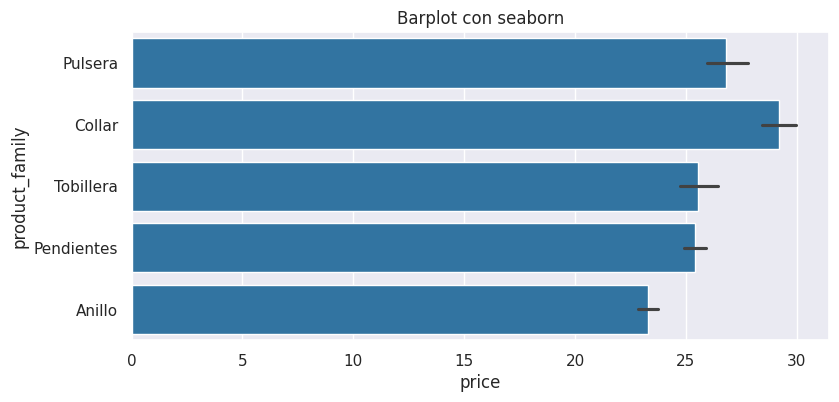

In [25]:
# Grafico de barras

plt.figure(figsize=(9, 4))

sns.set_style('darkgrid')
sns.set_context('notebook')

sns.barplot( x='price', y = "product_family", data=data)
plt.title('Barplot con seaborn')
plt.show()


<Axes: xlabel='product_family', ylabel='count'>

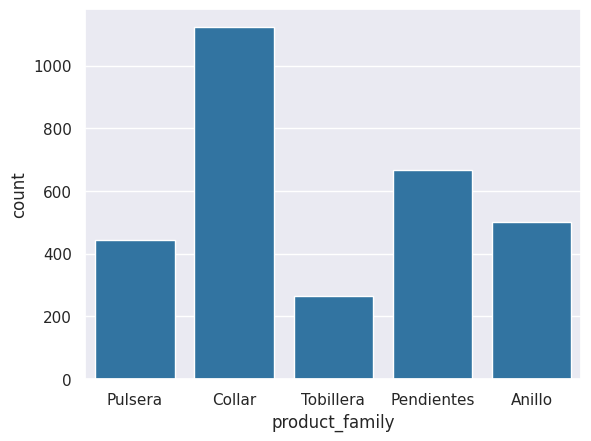

In [23]:
# Countplot
sns.countplot(data, x="product_family")
plt.title('Countplot con seaborn')
plt.show()

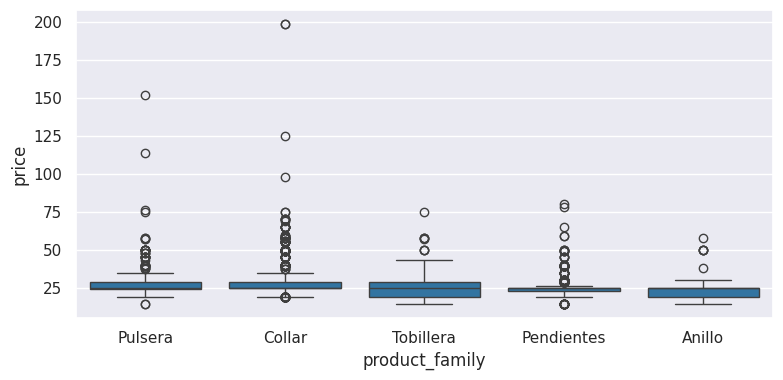

In [26]:
plt.figure(figsize=(9, 4))
ax = sns.boxplot(x='product_family', y='price', data=data)
# ax.set(ylim=(10, 80))


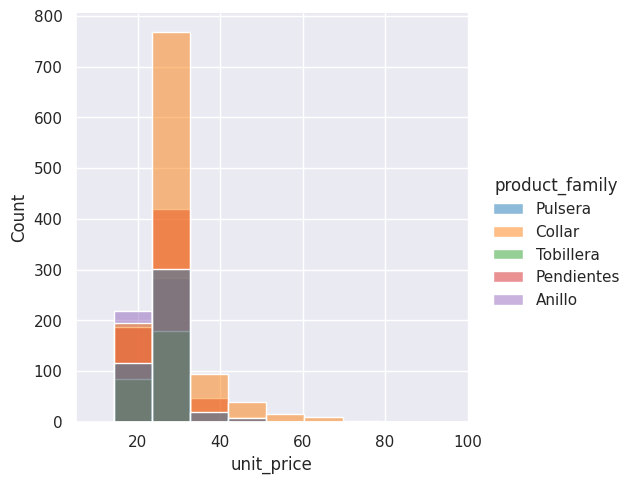

In [27]:
# Distribucion del precio unitario por familia (hist)

ax = sns.displot(data, x = "unit_price", hue = "product_family", bins = 20, kind = "hist")
ax.set(xlim=(5,100))

(5.0, 90.0)

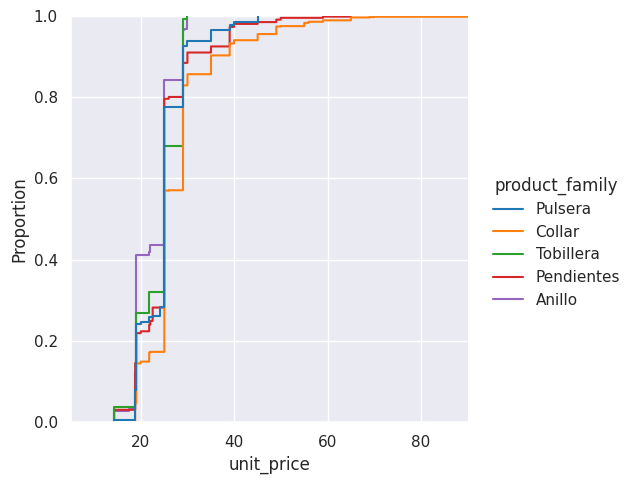

In [28]:
# Distribucion del precio unitario por familia (ecdf)

sns.displot(data = data, x = "unit_price", hue = "product_family", kind = "ecdf")
plt.xlim(5, 90)

(5.0, 90.0)

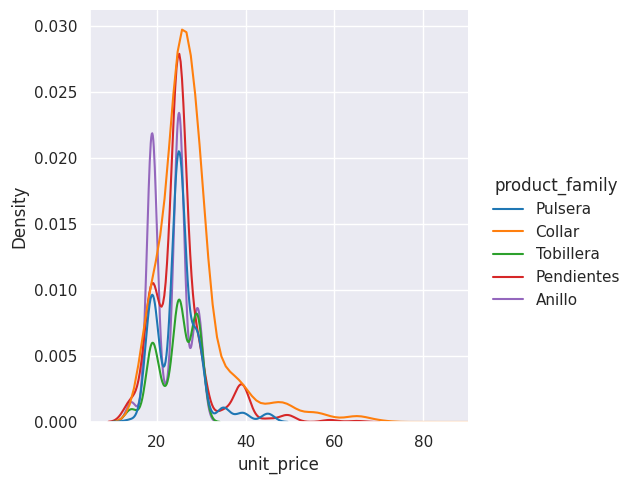

In [29]:
# Distribucion del precio unitario por familia

sns.displot(data = data, x = "unit_price", hue = "product_family", kind = "kde")
plt.xlim(5, 90)


FacetGrid es una poderosa herramienta de seaborn para crear gráficos en función de subgrupos dentro de tus datos. Permite crear varios gráficos basados en valores de una o más variables categóricas.

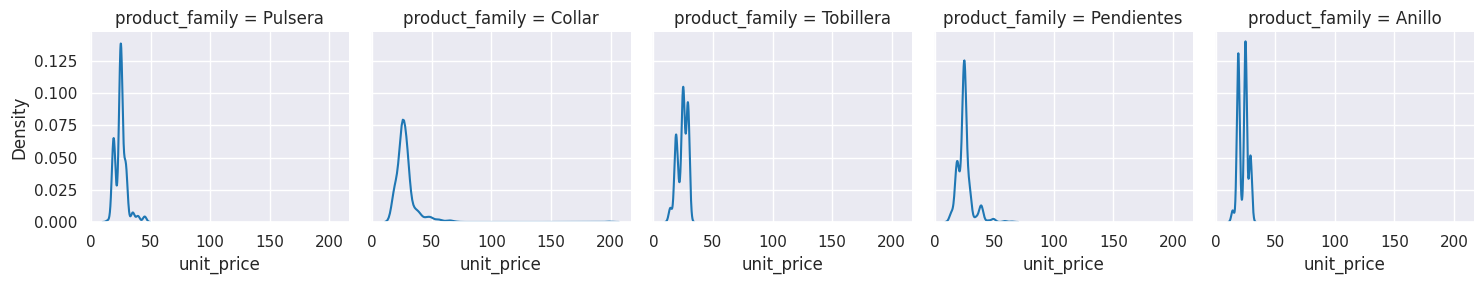

In [33]:
# Distribucion del unit_pice por familia con facet grid
g = sns.FacetGrid(data, col="product_family")
g.map(sns.kdeplot, "unit_price")
# g.set(xlim=(0, 100))

(5.0, 90.0)

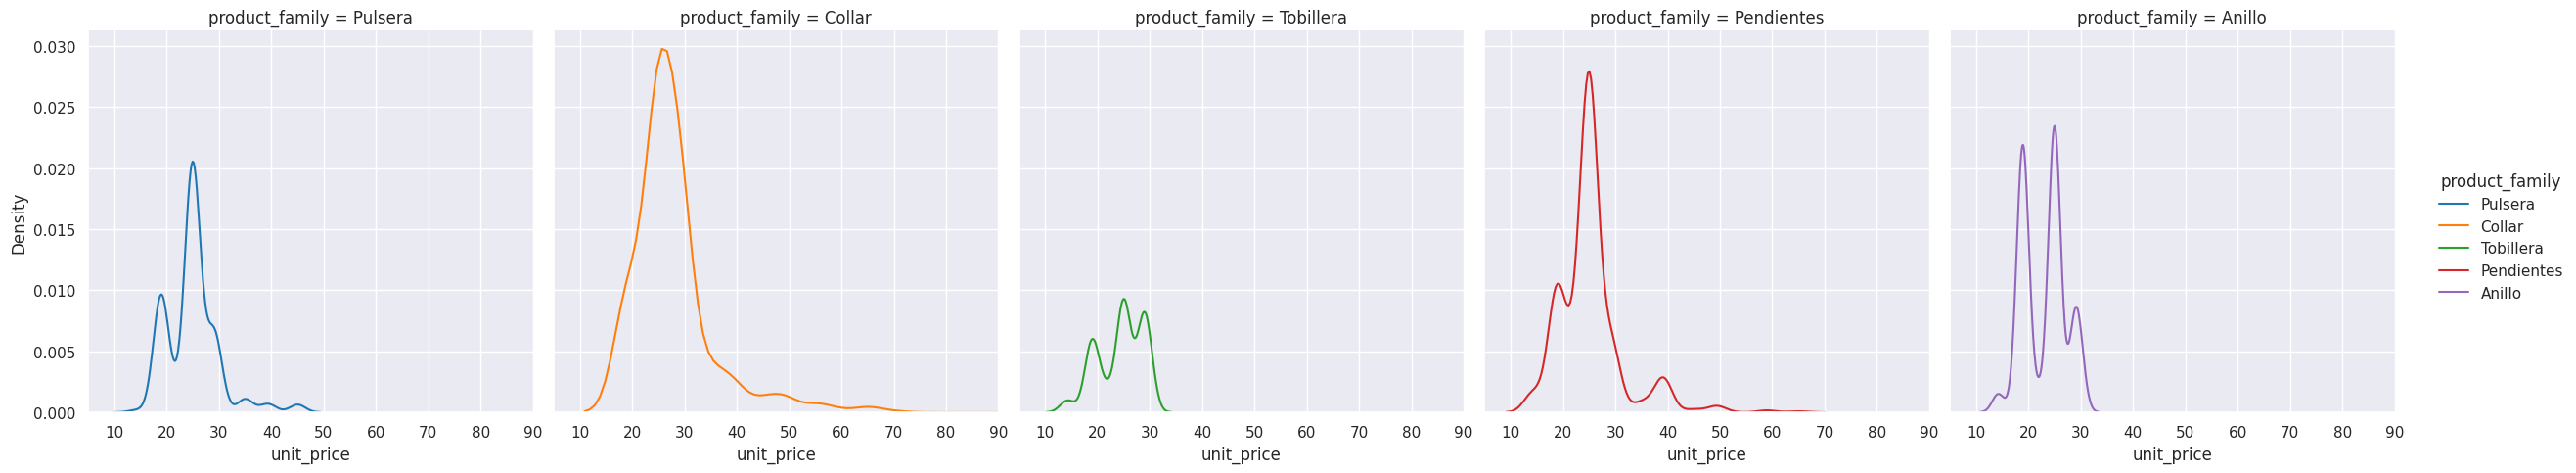

In [34]:
sns.displot(data = data, x = "unit_price", hue = "product_family", kind = "kde", col = "product_family")
plt.xlim(5, 90)

Los heatmaps se utilizan para visualizar tablas de datos en forma de cuadrícula, donde los colores representan valores. Se suelen usar mucho para representar correlaciones.


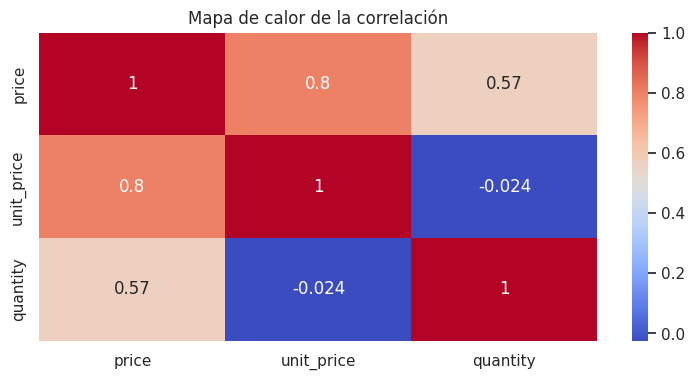

In [35]:
plt.figure(figsize=(9, 4))
corr = data[["price", "unit_price", "quantity"]].corr()

# Crear un heatmap de la tabla de correlación
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title('Mapa de calor de la correlación')
plt.show()

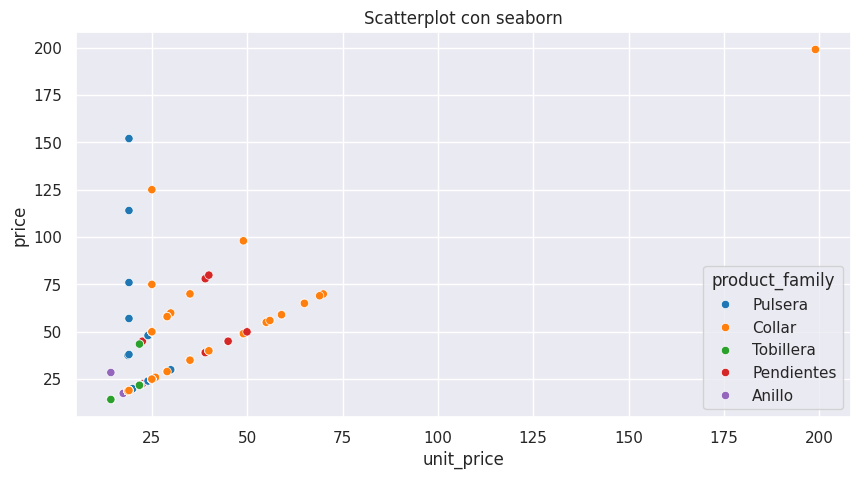

In [36]:
## Seaborn scatterplot
plt.figure(figsize=(10, 5))

sns.scatterplot(x='unit_price', y='price', hue = "product_family", data=data)
plt.title('Scatterplot con seaborn')
plt.show()


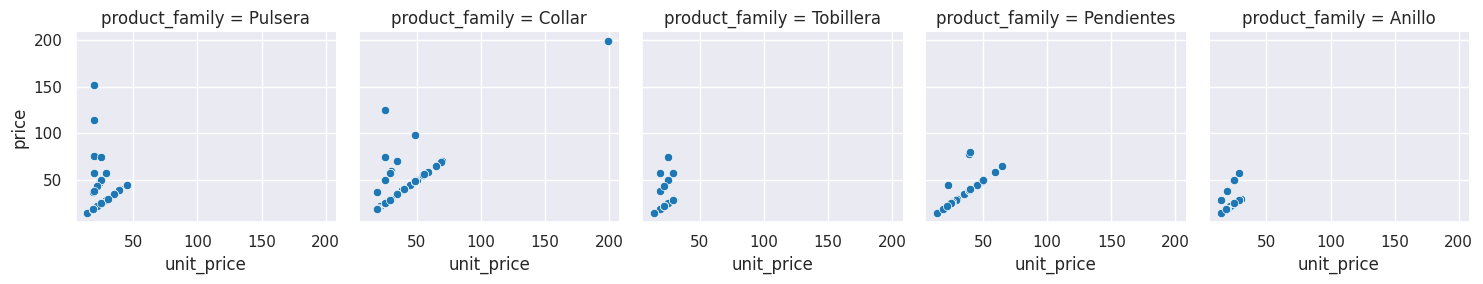

In [37]:
# Crear una cuadrícula de gráficos
# plt.figure(figsize=(4, 4))

g = sns.FacetGrid(data, col="product_family")

# Aplicar un gráfico a la cuadrícula
g.map(sns.scatterplot, "unit_price", "price")

plt.show()

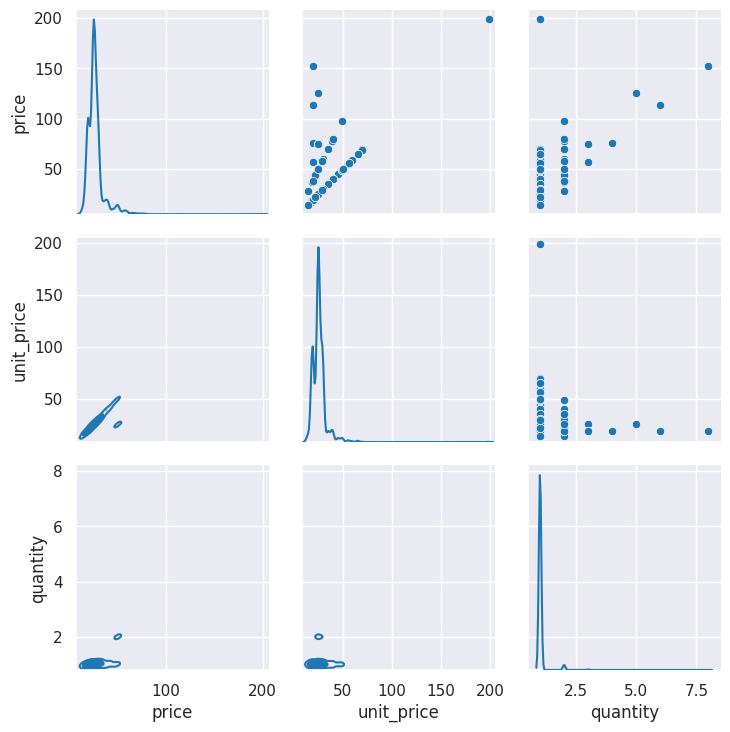

In [38]:
# Descripcion con pairgrid

g = sns.PairGrid(data[["price", "unit_price", "quantity"]], diag_sharey=False)
g.map_upper(sns.scatterplot, )
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

<Axes: xlabel='fecha', ylabel='order_id'>

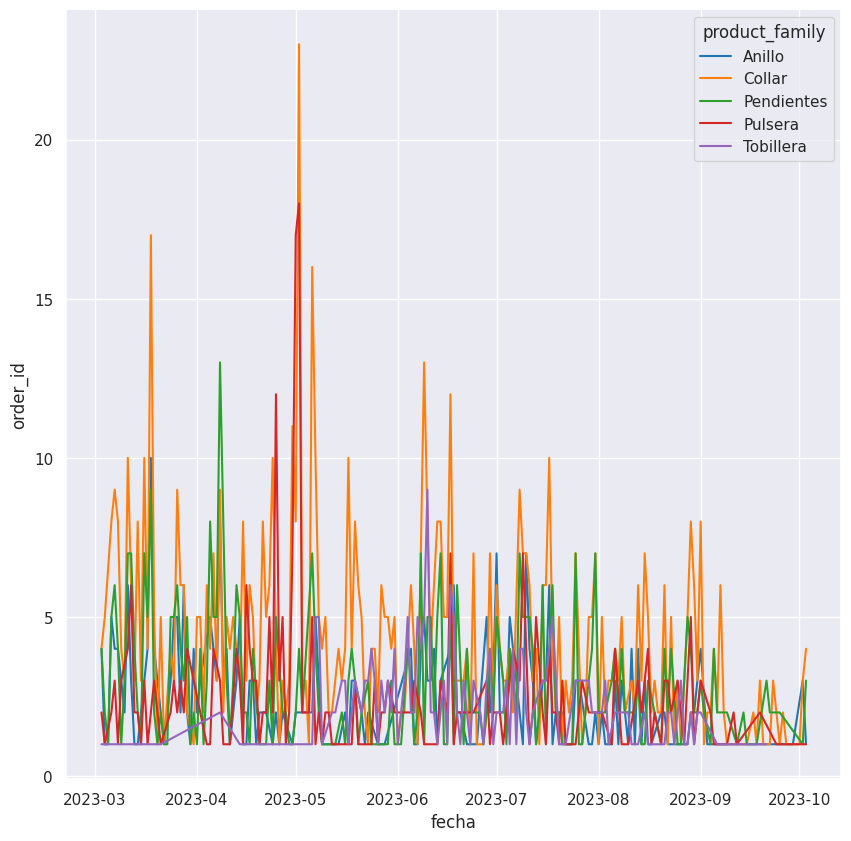

In [40]:
data_daily = data.groupby(["fecha", "product_family"], as_index = False)["order_id"].agg("nunique")
# data_daily["fecha"] = pd.to_datetime(data_daily["fecha"])  #! Sin esto, lo considerara como categorica
plt.figure(figsize=(10, 10))
sns.lineplot(data = data_daily, x = "fecha", y = "order_id", hue = "product_family")

Hasta ahora hemos visto varios paquetes para hacer gráficos, pero normalmente queremos cierta interactividad con los gráficos. El poder hacer hacer zoom o filtrar datos en el gráfico se vuelve vital cuando tenemos muchos datos. Para abordar esto tenemos la libreria de Plotly.

Plotly es una biblioteca de visualización de datos interactiva para Python que permite crear gráficos dinámicos y personalizables. A diferencia de bibliotecas como Matplotlib, que genera gráficos estáticos, Plotly permite que los gráficos tengan elementos interactivos como zoom, hover para mostrar datos específicos y la capacidad de seleccionar o filtrar puntos de datos en tiempo real.

Plotly tiene dos interfaces principales para crear gráficos en Python: Plotly Express y Graph Objects. Ambas interfaces tienen sus ventajas, y entender la diferencia te ayudará a elegir la mejor opción según tus necesidades.

- Plotly Express es la interfaz de alto nivel de Plotly, diseñada para crear gráficos rápidamente con poco código. Es perfecta para exploración y creación de gráficos básicos o cuando tienes datos en formato de pandas DataFrame.

- Graph Objects es la interfaz de bajo nivel de Plotly y ofrece un control total sobre cada aspecto de los gráficos. Es más detallada y permite realizar personalizaciones avanzadas, como ajustar cada elemento del gráfico individualmente.

In [41]:
import plotly.express as px

fig = px.scatter(data, y="price", x="unit_price", color="product_family")
fig.show()

In [42]:
# Distribucion del unit_price con un histograma

px.histogram(data, x = "unit_price", marginal = "box", nbins = 20)

In [46]:
# Histograma separando por familia

import plotly.graph_objects as go

fig = go.Figure()
for family in data["product_family"].unique():
    fig.add_trace(go.Histogram(x=data[data["product_family"] == family]["unit_price"], name = family))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
# Distribucion acumulada del unit_price por familia
px.ecdf(data, x = "unit_price", color = "product_family", marginal = "box")

In [43]:
px.box(data, x = "unit_price", color = "product_family")

In [ ]:
# Pie chart

facturacion_por_familia = data.groupby("product_family", as_index = False)["price"].agg("sum")
fig = px.pie(facturacion_por_familia, values='price', names='product_family', title='Pie chart')
fig


In [44]:
# Numero de orders por dia

data_daily = data.groupby(["fecha", "product_family"], as_index = False).agg({"order_id":"nunique", "unit_price": "mean"})
data_daily["fecha"] = pd.to_datetime(data_daily["fecha"])

fig = px.line(data_daily, x = "fecha", y = "order_id", color = "product_family")


fig

In [47]:
# Grafica con 2 ejes y



data_daily = data.groupby("fecha", as_index = False).agg({"order_id":"nunique", "unit_price": "mean"})
data_daily["fecha"] = pd.to_datetime(data_daily["fecha"])

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data_daily["fecha"], y=data_daily["order_id"], name="Num orders"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data_daily["fecha"], y=data_daily["unit_price"], name="precio unitario medio"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Ejemplo doble eje"
)

# Set x-axis title
fig.update_xaxes(title_text="Grafica con varios ejes")

# Set y-axes titles
fig.update_yaxes(title_text="Num orders", secondary_y=False)
fig.update_yaxes(title_text="precio unitario medio", secondary_y=True)

fig.show()

### Automatizaciones

Al principio puede parecer un tanto tedioso la cantidad de comandos y formas posibles para visualizar los datos. Por eso nacen librerias para quitar carga de trabajo a la hora de visualizar los datos.

Entre las más conocidas podemos encontrar:

- PandasGUI: Es una interfaz gráfica de usuario para explorar y manipular DataFrames de pandas de manera interactiva. Es útil para explorar datos y realizar manipulaciones básicas sin escribir mucho código.

- Sweetviz e ydata-profiling: Son bibliotecas para generar reportes automáticos y visuales de un DataFrame, enfocándose en el análisis exploratorio de datos. Generan reportes en HTML con análisis detallados de las columnas, comparaciones entre datasets, y gráficos para visualizar la distribución y relaciones entre variables.

In [48]:
!pip install pandasgui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.2/218.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.9/983.9 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 11.8 MB/s

In [52]:
import pandasgui
# import os
# os.environ['APPDATA'] = ""
pandasgui.show(data)

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [53]:
!pip install sweetviz
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d5e0e72645d49a6e7a916673c6117dc738fb773cf438e0c04e511629a89938ad
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [54]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html('sweetviz_eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [55]:
feature_config = sv.FeatureConfig(skip=["product_id", "order_id", "order_customer_id"], force_num=["quantity"])
my_report = sv.compare_intra(data, data["product_family"] == "Pendientes", ["Pendientes", "No Pendientes"], None, feature_config)

my_report.show_html('sweetviz_comparacion_pendientes_vs_resto.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_comparacion_pendientes_vs_resto.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [56]:

from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Profiling Report")
profile.to_file("ydata_profiling_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
from ydata_profiling import ProfileReport, compare

type_schema = {"quantity": "numeric"}

pendientes_report = ProfileReport(data[data["product_family"] == "Pendientes"], title="Pendientes", type_schema=type_schema)
no_pendientes_report = ProfileReport(data[data["product_family"] != "Pendientes"], title="Resto", type_schema=type_schema)

comparison_report = pendientes_report.compare(no_pendientes_report)
comparison_report.to_file("comparison.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]